In [4]:
import rasterio
from rasterio import merge
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [5]:
from rasterhandler import RasterHandler

In [6]:
tiff_path = "./Satellite_burned_area_dataset_part1/EMSR213_01VESUVIO_02GRADING_MAP_v2_vector/sentinel2_2017-06-27.tiff"

  Meta Veri    Değer                                Açıklama
0    driver    GTiff     Kullanılan sürücü veya veri formatı
1     dtype  float32             Veri tipi (örneğin, uint16)
2    nodata     None  Geçersiz (boş) değerlerin tanımlanması
3     width      894   Görüntünün genişliği piksel cinsinden
4    height      969  Görüntünün yüksekliği piksel cinsinden


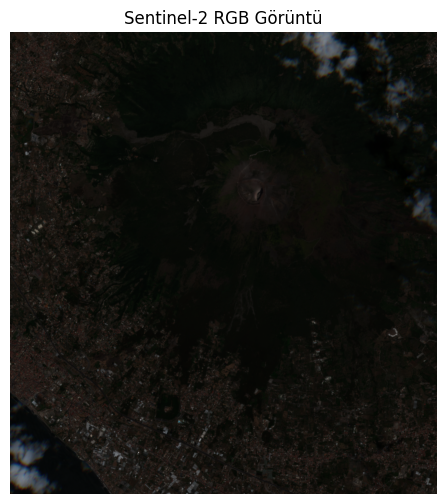

RGB görüntü başarıyla kaydedildi: ./outputs/sentinel2_rgb.png


In [7]:
_raster_data=RasterHandler(tiff_path)
_raster_data.get_metadata()
_raster_data.visualize_rgb()

In [17]:
def visualize_ndvi_with_threshold(src, threshold=None):
    """
    Rasterio veri kümesinden NDVI haritasını belirli bir eşik değeri üstünde
    yeşil, diğer alanları kırmızı olarak görselleştirir.

    Parameters:
    - src (rasterio.io.DatasetReader): Rasterio veri kümesi, TIFF dosyasının açılmış hali.
    - threshold (float): NDVI eşik değeri. Bu değeri geçen alanlar yeşil olacak.

    Returns:
    - None
    """
    # Kırmızı ve kızılötesi bantları al
    red = src.read(3)
    nir = src.read(8)

    # Sıfıra bölme hatasını önlemek için 0'a yakın değerler için bir tolere edici ekleyin
    np.seterr(divide='ignore', invalid='ignore')

    # NDVI hesaplama formülü
    ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

    cmap='RdYlGn'
    if threshold is not None:
        # NDVI haritasını oluşturma
        ndvi_masked = np.zeros_like(ndvi, dtype=np.uint8)
        ndvi_masked[ndvi >= threshold] = 1  # eşik değeri üstündeki alanlar için 1 (yeşil)
        ndvi_masked[ndvi < threshold] = 0   # eşik değeri altındaki alanlar için 0 (kırmızı)
    
        # Renk haritası oluşturma (yeşil ve kırmızı renkler)
        cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', 'green'], N=2)
        ndvi=ndvi_masked
    # NDVI haritasını görselleştirme
    plt.figure(figsize=(10, 10))
    plt.imshow(ndvi, cmap=cmap, interpolation='none')
    plt.colorbar( label='NDVI')
    plt.title('Normalized Difference Vegetation Index (NDVI)')
    plt.axis('off')
    plt.show()

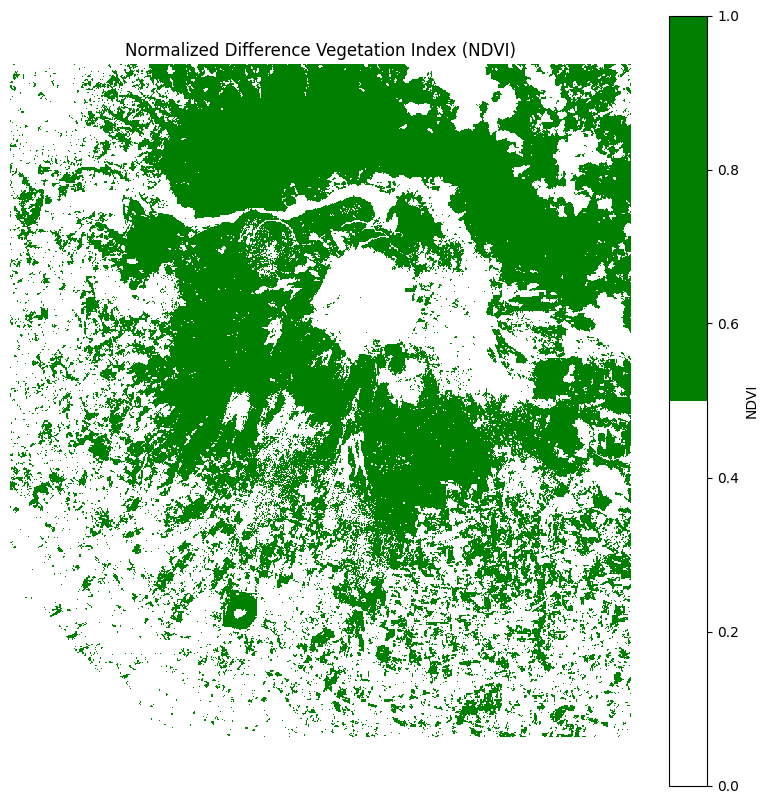

In [21]:
# Örnek kullanım:
threshold_value = 0.3  # Örneğin, NDVI değeri 0.3 olan alanları yeşil, diğerlerini kırmızı gösterir
visualize_ndvi_with_threshold(_raster_data.src,0.55)